In [41]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# Pandas is used for data manipulation
import pandas as pd
import seaborn as sns
# Read in data and display first 5 rows
features = pd.read_csv('heart.csv')
features.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
print('The shape of our features is:', features.shape)

The shape of our features is: (303, 14)


In [43]:
# Descriptive statistics for each column
features.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


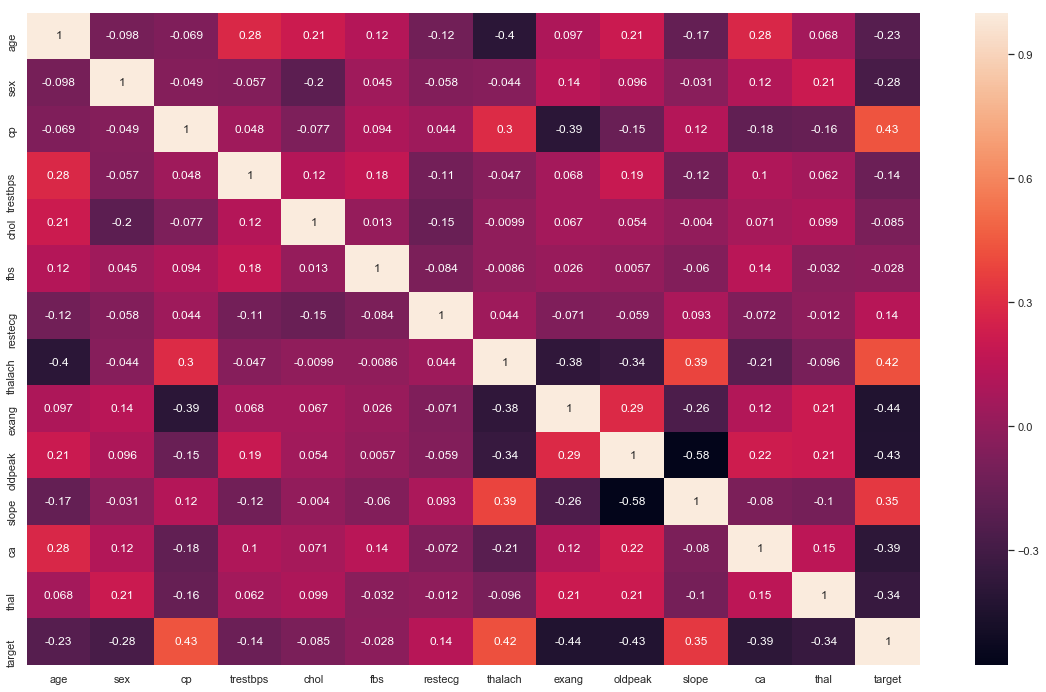

In [44]:

plt.figure(figsize=(20,12)) 
sns.heatmap(features.corr(), annot=True)

In [4]:
#changing to understandable feature names
features.columns = ['age','sex','chest_pain_experienced','resting_blood_pressure','cholesterol','fasting_blood_sugar','Resting_electrocardiographic_measurement',
                  'maximum_heart_rate','exercise_induced_angina','ST_depression','peak_ST_slope','major_vessels_number','thalassemia',
                   'target']

In [5]:
#datatypes
features.dtypes

age                                           int64
sex                                           int64
chest_pain_experienced                        int64
resting_blood_pressure                        int64
cholesterol                                   int64
fasting_blood_sugar                           int64
Resting_electrocardiographic_measurement      int64
maximum_heart_rate                            int64
exercise_induced_angina                       int64
ST_depression                               float64
peak_ST_slope                                 int64
major_vessels_number                          int64
thalassemia                                   int64
target                                        int64
dtype: object

In [6]:
# One-hot encode the data using pandas get_dummies
features_encoded = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
features_encoded.iloc[:,5:].head(5)

,fasting_blood_sugar,Resting_electrocardiographic_measurement,maximum_heart_rate,exercise_induced_angina,ST_depression,peak_ST_slope,major_vessels_number,thalassemia,target
0,1,0,150,0,2.3,0,0,1,1
1,0,1,187,0,3.5,0,0,2,1
2,0,0,172,0,1.4,2,0,2,1
3,0,1,178,0,0.8,2,0,2,1
4,0,1,163,1,0.6,2,0,2,1


In [7]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['target'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('target', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [8]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [9]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (227, 13)
Training Labels Shape: (227,)
Testing Features Shape: (76, 13)
Testing Labels Shape: (76,)


In [10]:
# The baseline predictions are the historical averages
#baseline_preds = test_features[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
#baseline_errors = abs(baseline_preds - test_labels)
#print('Average baseline error: ', round(np.mean(baseline_errors), 2))
#print(features)
#validation_features = train_features[]

In [16]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42,max_depth=5)
# Train the model on training data
rf.fit(train_features, train_labels);


In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, train_features, train_labels,cv=5)
for i in range(len(scores)):
    print("score {} : {}".format(i+1,scores[i]))

score 1 : 0.443101124633448
score 2 : 0.3196844043366244
score 3 : 0.3960158250009558
score 4 : 0.4795770299958537
score 5 : 0.5084473306553251


In [22]:
# #
# estimator = rf.estimators_[1]
# feature_names = [i for i in feature_list]

# test_features_str = train_labels.astype('str')
# test_features_str[test_features_str == '0'] = 'no disease'
# test_features_str[test_features_str == '1'] = 'disease'
# test_features_str = test_features_str.values


In [23]:
from sklearn.tree import export_graphviz
import os
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = test_features_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# from IPython.display import Image
# Image(filename = 'tree.png')
os.system('dot -Tpng tree.dot -o tree.png')

1

In [24]:
from sklearn.metrics import mean_squared_error,accuracy_score
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
#Prediction set

prediction_round=np.around(predictions)

error = mean_squared_error(test_labels,prediction_round)
accuracy = accuracy_score(test_labels,prediction_round)
print("Error %f , Accuracy %f"%(error,accuracy))


Error 0.157895 , Accuracy 0.842105


In [25]:
from sklearn import metrics
#target_names = ['Heart Disease not present', 'Heart Disease present']
#print(metrics.classification_report(prediction_round, test_labels,target_names=target_names))
print(metrics.classification_report(prediction_round, test_labels))

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82        33
         1.0       0.88      0.84      0.86        43

   micro avg       0.84      0.84      0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



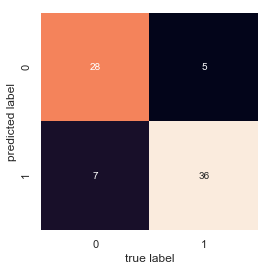

In [26]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test_labels, prediction_round)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
#import pdb;pdb.set_trace()
plt.xlabel('true label')
plt.ylabel('predicted label');

In [27]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: major_vessels_number Importance: 0.23
Variable: chest_pain_experienced Importance: 0.15
Variable: ST_depression        Importance: 0.12
Variable: thalassemia          Importance: 0.12
Variable: age                  Importance: 0.07
Variable: exercise_induced_angina Importance: 0.07
Variable: resting_blood_pressure Importance: 0.06
Variable: maximum_heart_rate   Importance: 0.06
Variable: cholesterol          Importance: 0.05
Variable: peak_ST_slope        Importance: 0.04
Variable: sex                  Importance: 0.02
Variable: fasting_blood_sugar  Importance: 0.01
Variable: Resting_electrocardiographic_measurement Importance: 0.01


Feature ranking:
1. feature major_vessels_number (0.230268)
2. feature chest_pain_experienced (0.150560)
3. feature ST_depression (0.118506)
4. feature thalassemia (0.117415)
5. feature age (0.068991)
6. feature exercise_induced_angina (0.066911)
7. feature maximum_heart_rate (0.064083)
8. feature resting_blood_pressure (0.060638)
9. feature cholesterol (0.048536)
10. feature peak_ST_slope (0.041318)
11. feature sex (0.018525)
12. feature Resting_electrocardiographic_measurement (0.009059)
13. feature fasting_blood_sugar (0.005190)


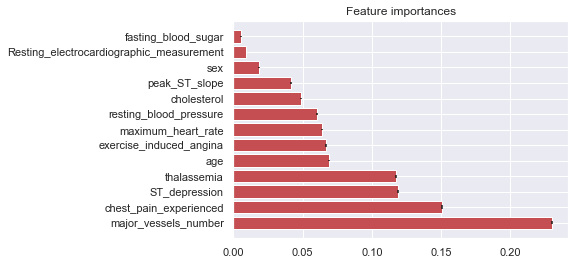

In [28]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

tempList=[]
for f in range(train_features.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_list[indices[f]], importances[indices[f]]))
    tempList.append(feature_list[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(train_features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.yticks(range(train_features.shape[1]), tempList)
plt.ylim([-1, train_features.shape[1]])
plt.show()


In [36]:
from sklearn.ensemble import AdaBoostClassifier
adbc = AdaBoostClassifier(n_estimators=1000,algorithm='SAMME',random_state=42,learning_rate=0.001)

#getting the highest importacne indices and train using them
#important_indices = [i for i in ]
important_indices = [feature_list.index('major_vessels_number'), feature_list.index('chest_pain_experienced'),feature_list.index('ST_depression'),feature_list.index('thalassemia')
                    ]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

adbc.fit(train_important, train_labels)


scores = cross_val_score(adbc, train_important, train_labels,cv=5)
for i in range(len(scores)):
    print("score {} : {}".format(i+1,scores[i]))


adb_predictions = adbc.predict(test_important)
#import pdb;pdb.set_trace()
error = mean_squared_error(test_labels,adb_predictions)
accuracy = accuracy_score(test_labels,adb_predictions)
print("Error %f , Accuracy %f"%(error,accuracy))

score 1 : 0.782608695652174
score 2 : 0.8043478260869565
score 3 : 0.7608695652173914
score 4 : 0.8
score 5 : 0.8181818181818182
Error 0.131579 , Accuracy 0.868421


In [ ]:
mat = confusion_matrix(test_labels, adb_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
#import pdb;pdb.set_trace()
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
print(metrics.classification_report(adb_predictions, test_labels))
